In [1]:
import os
import random
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
colors = [
    'blue', 'green', 'red', 'cyan', 'magenta',
    'yellow', 'black', 'orange', 'purple', 'brown',
    'pink', 'grey', 'maroon', 'gold', 'chocolate',
    'aqua', 'darkviolet', 'crimson', 'navy', 'darkgreen',
    'peru', 'tan', 'seagreen', 'darkslategrey', 'teal'
]

In [3]:
# constants
A = 3e-4
use_precise_transform = False

## Let's load the data files

In [4]:
# define the particle data group which we want to run the algorithms on
pdg = 211

# get the respective datasets locations
data_dir = os.path.join('..', '..', '..', 'data')
root_dirs = {
    'ideal':
        os.path.join(data_dir, 'pdg{}'.format(pdg), 'pdg{}-n25-0.5to10GeV-0.5eta'.format(pdg)),
    'mat':
        os.path.join(data_dir, 'pdg{}'.format(pdg),
                     'pdg{}-n25-0.5to10GeV-0.5eta-with-material-effects'.format(pdg)),
    'odd-bfield':
        os.path.join(data_dir, 'pdg{}'.format(pdg),
                     'pdg{}-n25-0.5to10GeV-0.5eta-non-homogenous-magnetic-field'.format(pdg)),
    'mat-odd-bfield':
        os.path.join(data_dir, 'pdg{}'.format(pdg),
                     'pdg{}-n25-0.5to10GeV-0.5eta-with-material-effects-non-' \
                     'homogenous-magnetic-field'.format(pdg))
}


# read the hits files and dataset
hit_files = {
    _type: sorted([file for file in os.listdir(root_dir) if file.endswith("-hits.csv")])
    for _type, root_dir in root_dirs.items()
}
hit_dfs = {
    _type: [pd.read_csv(os.path.join(root_dirs[_type], file), dtype={'particle_id':str, 'geometry_id': str})
            for file in files]
    for _type, files in hit_files.items()
}

# read the initial files and dataset
initial_files = {
    _type: sorted([file for file in os.listdir(root_dir) if file.endswith("-particles_initial.csv")])
    for _type, root_dir in root_dirs.items()
}
initial_dfs = {
    _type: [pd.read_csv(os.path.join(root_dirs[_type], file), dtype={'particle_id':str, 'geometry_id': str})
            for file in files]
    for _type, files in initial_files.items()
}

# read the final files and dataset
final_files = {
    _type: sorted([file for file in os.listdir(root_dir) if file.endswith("-particles_final.csv")])
    for _type, root_dir in root_dirs.items()
}
final_dfs = {
    _type: [pd.read_csv(os.path.join(root_dirs[_type], file), dtype={'particle_id':str, 'geometry_id': str})
            for file in files]
    for _type, files in final_files.items()
}

## Let's pick an event at random from every simulation

In [5]:
num_events = 100
random.seed(682021)

# pick an event randomly for each case
random_event = random.choice(range(0, num_events))
ideal_df = hit_dfs['ideal'][random_event]
ideal_df['weight'] = 1
ideal_df['r'] = np.sqrt(np.square(ideal_df['tx']) + np.square(ideal_df['ty']))
ideal_df['phi'] = np.arctan2(ideal_df['ty'], ideal_df['tx'])
ideal_df['xy_track'] = ideal_df[['r','phi']].apply(lambda pair: (pair[0], pair[1]), 1)
ideal_df['rz_track'] = ideal_df[['r','tz']].apply(lambda pair: (-pair[0], pair[1]), 1)
print(f"Event chosen for the ideal simulation:\t\t\t\t\t\t{hit_files['ideal'][random_event]}")

random_event = random.choice(range(0, num_events))
mat_df = hit_dfs['mat'][random_event]
mat_df['weight'] = 1
mat_df['r'] = np.sqrt(np.square(mat_df['tx']) + np.square(mat_df['ty']))
mat_df['phi'] = np.arctan2(mat_df['ty'], mat_df['tx'])
mat_df['xy_track'] = mat_df[['r','phi']].apply(lambda pair: (pair[0], pair[1]), 1)
mat_df['rz_track'] = mat_df[['r','tz']].apply(lambda pair: (-pair[0], pair[1]), 1)
print(f"Event chosen for the simulation with material effect:\t\t\t\t{hit_files['mat'][random_event]}")

random_event = random.choice(range(0, num_events))
odd_bfield_df = hit_dfs['odd-bfield'][random_event]
odd_bfield_df['weight'] = 1
odd_bfield_df['r'] = np.sqrt(np.square(odd_bfield_df['tx']) + np.square(odd_bfield_df['ty']))
odd_bfield_df['phi'] = np.arctan2(odd_bfield_df['ty'], odd_bfield_df['tx'])
odd_bfield_df['xy_track'] = odd_bfield_df[['r','phi']].apply(lambda pair: (pair[0], pair[1]), 1)
odd_bfield_df['rz_track'] = odd_bfield_df[['r','tz']].apply(lambda pair: (-pair[0], pair[1]), 1)
print(f"Event chosen for the simulation with non-homogenous B:\t\t\t\t"
      f"{hit_files['odd-bfield'][random_event]}")

random_event = random.choice(range(0, num_events))
mat_odd_bfield_df = hit_dfs['mat-odd-bfield'][random_event]
mat_odd_bfield_df['weight'] = 1
mat_odd_bfield_df['r'] = np.sqrt(np.square(mat_odd_bfield_df['tx']) + np.square(mat_odd_bfield_df['ty']))
mat_odd_bfield_df['phi'] = np.arctan2(mat_odd_bfield_df['ty'], mat_odd_bfield_df['tx'])
mat_odd_bfield_df['xy_track'] = mat_odd_bfield_df[['r','phi']].apply(lambda pair: (pair[0], pair[1]), 1)
mat_odd_bfield_df['rz_track'] = mat_odd_bfield_df[['r','tz']].apply(lambda pair: (-pair[0], pair[1]), 1)
print(f"Event chosen for the simulation with material effect and non-homogenous B:\t"
      f"{hit_files['mat-odd-bfield'][random_event]}")

Event chosen for the ideal simulation:						event000000074-hits.csv
Event chosen for the simulation with material effect:				event000000017-hits.csv
Event chosen for the simulation with non-homogenous B:				event000000045-hits.csv
Event chosen for the simulation with material effect and non-homogenous B:	event000000003-hits.csv


## We will run the Hough Transform on the Ideal dataset and remove the duplicates from it

In [6]:
from src.utils.hough_transform import compute_approximate_qpt, hough2d_pipeline
from src.utils.metrics import efficiency_rate, fake_rate, duplicate_rate

In [7]:
xy_hyperparams = {
    'bin-size': (0.003, 0.15),
    'xrange': (-np.pi, np.pi),
    'yrange': (-1000, 1000),
    'minimum-hits-per-bin': 10
}

rz_hyperparams = {
    'bin-size': (0.04, 15),
    'xrange': (-1, 1),
    'yrange': (-1150, 1150),
    'minimum-hits-per-bin': 6
}

In [8]:
accumulator, xy_est = hough2d_pipeline(list(ideal_df['xy_track']), xy_hyperparams, compute_approximate_qpt)

ideal_df['track'] = ideal_df['xy_track']
xy_eff = efficiency_rate(xy_est.values(), ideal_df)
xy_fake = fake_rate(xy_est.values(), ideal_df)
xy_dup = duplicate_rate(xy_est.values(), ideal_df)

print('xy Transform statistics:\n')
print(f'\tEfficiency rate: {xy_eff:.2f}')
print(f'\tFake rate: {xy_fake:.2f}')
print(f'\tDuplicate rate: {xy_dup:.2f}')
print()
print(f'\tNumber of tracks estimated: {len(xy_est)}')

xy Transform statistics:

	Efficiency rate: 1.00
	Fake rate: 0.59
	Duplicate rate: 0.97

	Number of tracks estimated: 774


In [9]:
from duplicate_removal_utils import get_roi_accumulator, plot_heatmap

# roi_x = xy_hyperparams['xrange']
# roi_y = xy_hyperparams['yrange']

roi_x = (-3.07, -2.8)
roi_y = (-1.11, 0.4)

rois = (roi_x, roi_y)
roi_accumulator_orig = get_roi_accumulator(accumulator, xy_hyperparams, rois)

roi_accumulator = roi_accumulator_orig.copy()
roi_accumulator.shape

(90, 10)

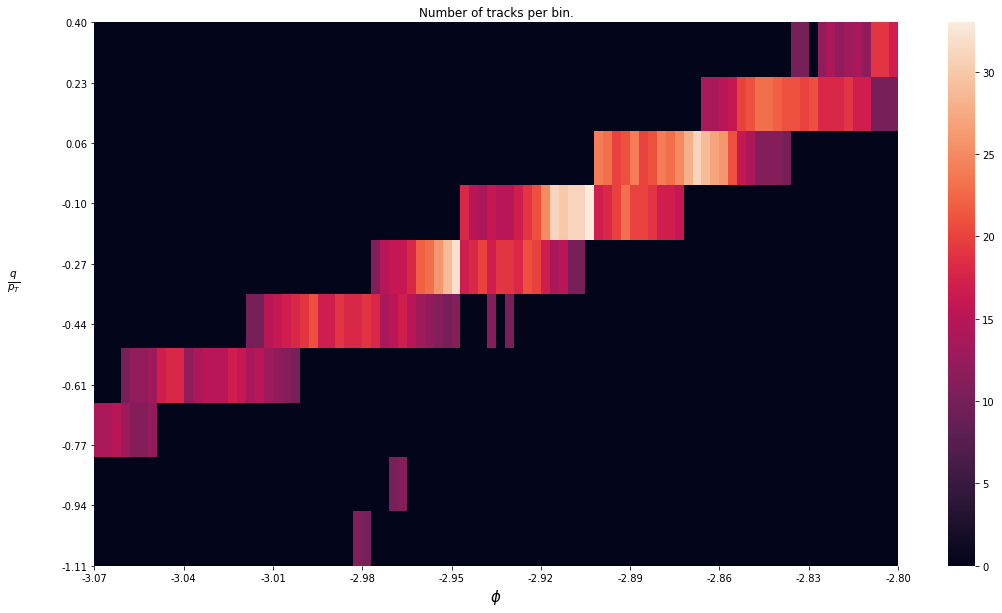

In [10]:
indices_below_thresh = roi_accumulator < xy_hyperparams['minimum-hits-per-bin']
roi_accumulator[indices_below_thresh] = 0
plot_heatmap(roi_accumulator, rois)

# Baseline solution: Identify peaks in the accumulator and aggregate them

In [11]:
from duplicate_removal_utils import duplicate_removal_1, get_track_to_geometry_mapping

threshold_x = 2500 * xy_hyperparams['bin-size'][0]
threshold_y = 1000 * xy_hyperparams['bin-size'][1]
closeness_thresholds = (threshold_x, threshold_y)
similarity_threshold = 0.19
hit_to_geom = get_track_to_geometry_mapping(ideal_df)

new_est = duplicate_removal_1(xy_est, closeness_thresholds, similarity_threshold,
                              remove_same_geometries=True, hit_to_geom=hit_to_geom)

ideal_df['track'] = ideal_df['xy_track']
xy_eff_dup_rem = efficiency_rate(new_est.values(), ideal_df)
xy_fake_dup_rem = fake_rate(new_est.values(), ideal_df)
xy_dup_dup_rem = duplicate_rate(new_est.values(), ideal_df)

print('xy Transform (Duplicate Removal 1) statistics:\n')
print(f'\tEfficiency rate: {xy_eff_dup_rem:.2f}')
print(f'\tFake rate: {xy_fake_dup_rem:.2f}')
print(f'\tDuplicate rate: {xy_dup_dup_rem:.2f}')
print()
print(f'\tNumber of tracks estimated: {len(new_est)}')

xy Transform (Duplicate Removal 1) statistics:

	Efficiency rate: 0.88
	Fake rate: 0.10
	Duplicate rate: 0.29

	Number of tracks estimated: 31


In [12]:
from duplicate_removal_utils import duplicate_removal_2, get_track_to_geometry_mapping

threshold_x = 1000 * xy_hyperparams['bin-size'][0]
threshold_y = 1000 * xy_hyperparams['bin-size'][1]
closeness_thresholds = (threshold_x, threshold_y)
similarity_threshold = 0.2
hit_to_geom = get_track_to_geometry_mapping(ideal_df)

new_est = duplicate_removal_2(xy_est, closeness_thresholds, similarity_threshold)

ideal_df['track'] = ideal_df['xy_track']
xy_eff_dup_rem = efficiency_rate(new_est.values(), ideal_df)
xy_fake_dup_rem = fake_rate(new_est.values(), ideal_df)
xy_dup_dup_rem = duplicate_rate(new_est.values(), ideal_df)

print('xy Transform (Duplicate Removal 2) statistics:\n')
print(f'\tEfficiency rate: {xy_eff_dup_rem:.2f}')
print(f'\tFake rate: {xy_fake_dup_rem:.2f}')
print(f'\tDuplicate rate: {xy_dup_dup_rem:.2f}')
print()
print(f'\tNumber of tracks estimated: {len(new_est)}')

xy Transform (Duplicate Removal 2) statistics:

	Efficiency rate: 0.72
	Fake rate: 0.14
	Duplicate rate: 0.14

	Number of tracks estimated: 22


Even though we removed many duplicate tracks, the duplicate-fake rates are
still very high. We should investigate a bit more on this issue.

## Let's plot the Purity for every estimated track

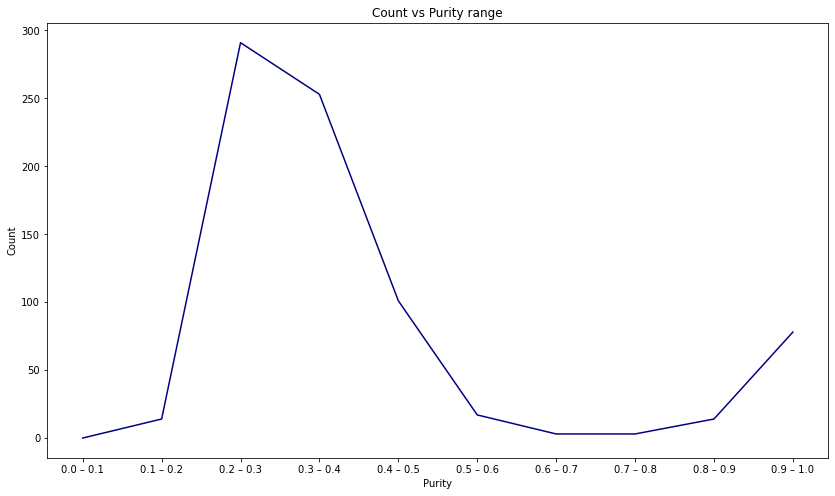

In [13]:
from src.utils.plotting import plot_purity_vs_count

plot_purity_vs_count(xy_est, ideal_df)

## Let's take a look at the hits inside a bin on the r-z plane

Number of hits inside the original bin: 33
Purity for the original bin is 0.5151515151515151



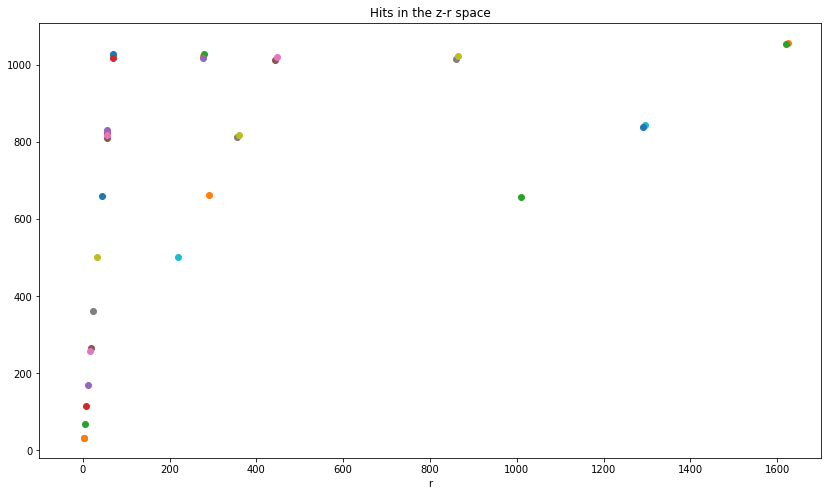

In [14]:
from duplicate_removal_utils import convert_tracks, plot_hits
from src.utils.metrics import get_track_to_truth_row_mapping, purity

# find a bin with at least 18 hits
target = []
for hits in xy_est.values():
    if len(hits) > 18:
        target = hits
        break

# print its purity
print(f'Number of hits inside the original bin: {len(target)}')
track_to_truth_row = get_track_to_truth_row_mapping(ideal_df)
p = purity(target, track_to_truth_row, ideal_df)[1]
print(f'Purity for the original bin is {p}\n')

# convert to rz hits and plot them
rz_tracks = convert_tracks(target, ideal_df, xy_to_rz=True)
xlims = (-100, 1700)
plot_hits(rz_tracks, ideal_df, xlims, xy=False)

## Now let's purify this bin using the rz Hough Transform

Number of hits inside the purified bin: 13
Purity for the purified bin is 1.0



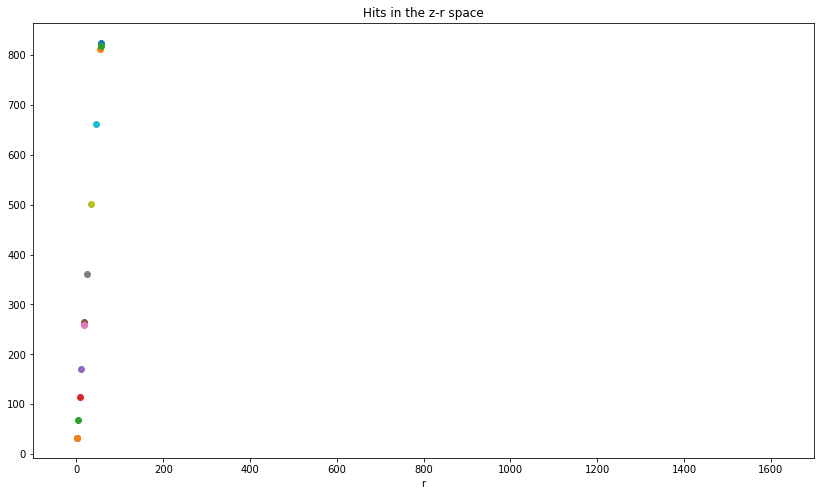

In [15]:
from duplicate_removal_utils import purify_xy_hits

purified_xy_hits = purify_xy_hits(target, rz_hyperparams, ideal_df)

# print its purity
print(f'Number of hits inside the purified bin: {len(purified_xy_hits)}')
track_to_truth_row = get_track_to_truth_row_mapping(ideal_df)
p = purity(purified_xy_hits, track_to_truth_row, ideal_df)[1]
print(f'Purity for the purified bin is {p}\n')

# convert to rz hits and plot them
rz_tracks = convert_tracks(purified_xy_hits, ideal_df, xy_to_rz=True)
plot_hits(rz_tracks, ideal_df, xlims, xy=False)

## Now we can purify all the estimated tracks and retry to remove the duplicates

In [16]:
from duplicate_removal_utils import purify_xy_estimations

rz_hyperparams = {
    'bin-size': (0.04, 15),
    'xrange': (-5, 5),
    'yrange': (-1000, 1000),
    'minimum-hits-per-bin': 7
}

purified_xy_est = purify_xy_estimations(xy_est, rz_hyperparams, ideal_df)

Let's plot the purity again to see if the above method worked.

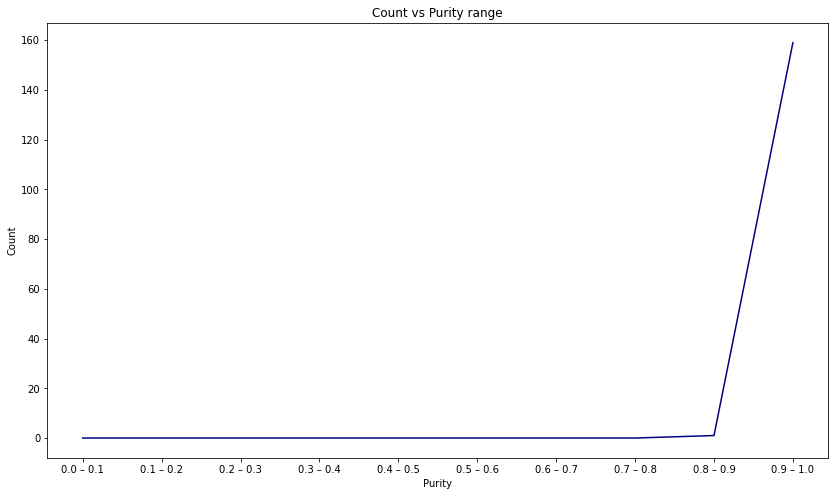

In [17]:
plot_purity_vs_count(purified_xy_est, ideal_df)

## Let's assess again the performances

In [18]:
ideal_df['track'] = ideal_df['xy_track']
purified_xy_eff = efficiency_rate(purified_xy_est.values(), ideal_df)
purified_xy_fake = fake_rate(purified_xy_est.values(), ideal_df)
purified_xy_dup = duplicate_rate(purified_xy_est.values(), ideal_df)

print('Purified xy Transform statistics:\n')
print(f'\tEfficiency rate: {purified_xy_eff:.2f}')
print(f'\tFake rate: {purified_xy_fake:.2f}')
print(f'\tDuplicate rate: {purified_xy_dup:.2f}')
print()
print(f'\tNumber of tracks estimated: {len(purified_xy_est)}')

Purified xy Transform statistics:

	Efficiency rate: 1.00
	Fake rate: 0.00
	Duplicate rate: 0.84

	Number of tracks estimated: 160


In [19]:
threshold_x = 250 * xy_hyperparams['bin-size'][0]
threshold_y = 100 * xy_hyperparams['bin-size'][1]
closeness_thresholds = (threshold_x, threshold_y)
similarity_threshold = 0.05
hit_to_geom = get_track_to_geometry_mapping(ideal_df)

purified_new_est = duplicate_removal_1(purified_xy_est,
                                       closeness_thresholds,
                                       similarity_threshold,
                                       remove_same_geometries=True,
                                       hit_to_geom=hit_to_geom)

ideal_df['track'] = ideal_df['xy_track']
xy_eff_dup_rem = efficiency_rate(purified_new_est.values(), ideal_df)
xy_fake_dup_rem = fake_rate(purified_new_est.values(), ideal_df)
xy_dup_dup_rem = duplicate_rate(purified_new_est.values(), ideal_df)

print('Purified xy Transform (Duplicate Removal 1) statistics:\n')
print(f'\tEfficiency rate: {xy_eff_dup_rem:.2f}')
print(f'\tFake rate: {xy_fake_dup_rem:.2f}')
print(f'\tDuplicate rate: {xy_dup_dup_rem:.2f}')
print()
print(f'\tNumber of tracks estimated: {len(purified_new_est)}')

Purified xy Transform (Duplicate Removal 1) statistics:

	Efficiency rate: 1.00
	Fake rate: 0.00
	Duplicate rate: 0.00

	Number of tracks estimated: 25


In [20]:
threshold_x = 1000 * xy_hyperparams['bin-size'][0]
threshold_y = 1000 * xy_hyperparams['bin-size'][1]
closeness_thresholds = (threshold_x, threshold_y)
similarity_threshold = 0.5
hit_to_geom = get_track_to_geometry_mapping(ideal_df)

purified_new_est = duplicate_removal_2(purified_xy_est,
                                       closeness_thresholds,
                                       similarity_threshold,
                                       remove_same_geometries=True,
                                       hit_to_geom=hit_to_geom)

ideal_df['track'] = ideal_df['xy_track']
xy_eff_dup_rem = efficiency_rate(purified_new_est.values(), ideal_df)
xy_fake_dup_rem = fake_rate(purified_new_est.values(), ideal_df)
xy_dup_dup_rem = duplicate_rate(purified_new_est.values(), ideal_df)

print('xy Transform (Duplicate Removal 2) statistics:\n')
print(f'\tEfficiency rate: {xy_eff_dup_rem:.2f}')
print(f'\tFake rate: {xy_fake_dup_rem:.2f}')
print(f'\tDuplicate rate: {xy_dup_dup_rem:.2f}')
print()
print(f'\tNumber of tracks estimated: {len(purified_new_est)}')

xy Transform (Duplicate Removal 2) statistics:

	Efficiency rate: 1.00
	Fake rate: 0.00
	Duplicate rate: 0.11

	Number of tracks estimated: 28


## Let's run this for the whole dataset

In [21]:
dfs = hit_dfs['mat-odd-bfield']
# print(dfs)

In [22]:
sum_eff = 0
sum_fake = 0
sum_dup = 0

threshold_x = 3500 * xy_hyperparams['bin-size'][0]
threshold_y = 1000 * xy_hyperparams['bin-size'][1]
closeness_thresholds = (threshold_x, threshold_y)
similarity_threshold = 0.01

xy_hyperparams = {
    'bin-size': (0.001, 0.2),
    'xrange': (-np.pi, np.pi),
    'yrange': (-1000, 1000),
    'minimum-hits-per-bin': 10
}

rz_hyperparams = {
    'bin-size': (0.04, 20),
    'xrange': (-15, 15),
    'yrange': (-50000, 50000),
    'minimum-hits-per-bin': 6
}

In [23]:
for df in tqdm(dfs, total=len(dfs), desc='Hough Pipeline on Transforms'):

    # prepare dataframe
    df['weight'] = 1
    df['r'] = np.sqrt(np.square(df['tx']) + np.square(df['ty']))
    df['phi'] = np.arctan2(df['ty'], df['tx'])
    df['xy_track'] = df[['r','phi']].apply(lambda pair: (pair[0], pair[1]), 1)
    df['rz_track'] = df[['r','tz']].apply(lambda pair: (-pair[0], pair[1]), 1)

    # run the hough transform and purify the result
    _, xy_est = hough2d_pipeline(list(df['xy_track']), xy_hyperparams, compute_approximate_qpt)
    pur_xy_est = purify_xy_estimations(xy_est, rz_hyperparams, df)

    # remove duplicates
    df['track'] = df['xy_track']
    hit_to_geom = get_track_to_geometry_mapping(df)
    pur_new_est = duplicate_removal_1(pur_xy_est,
                                      closeness_thresholds,
                                      similarity_threshold,
                                      remove_same_geometries=False,
                                      hit_to_geom=hit_to_geom)

    # update results
    eff = efficiency_rate(pur_new_est.values(), df)
    fake = fake_rate(pur_new_est.values(), df)
    dup = duplicate_rate(pur_new_est.values(), df)
    print(eff, fake, dup)
    print()
    sum_eff += eff
    sum_fake += fake
    sum_dup += dup

Hough Pipeline on Transforms:   0%|          | 0/100 [00:00<?, ?it/s]

1.0 0.0 0.0

0.96 0.0 0.0

1.0 0.0 0.0

0.96 0.0 0.0

0.96 0.0 0.0

1.0 0.0 0.0

0.96 0.0 0.07692307692307687

0.96 0.0 0.0

1.0 0.0 0.0

1.0 0.0 0.0

1.0 0.0 0.0

1.0 0.0 0.0

0.96 0.0 0.0

1.0 0.0 0.038461538461538436

1.0 0.0 0.0

1.0 0.0 0.0

1.0 0.0 0.0

0.96 0.0 0.0

0.96 0.0 0.0

1.0 0.0 0.038461538461538436

1.0 0.0 0.0

1.0 0.0 0.0

1.0 0.0 0.0

0.96 0.0 0.040000000000000036

0.96 0.0 0.0

1.0 0.0 0.0

1.0 0.0 0.0

1.0 0.0 0.0

0.96 0.0 0.0

0.96 0.0 0.0

1.0 0.0 0.0

0.92 0.0 0.0

0.96 0.0 0.1428571428571429

1.0 0.0 0.0

0.96 0.0 0.0

0.92 0.0 0.0

0.96 0.0 0.0

1.0 0.0 0.0

0.96 0.0 0.1428571428571429

1.0 0.0 0.0

1.0 0.0 0.0

1.0 0.0 0.0

1.0 0.0 0.0

0.96 0.0 0.0

1.0 0.0 0.0

1.0 0.0 0.0

0.96 0.0 0.0

1.0 0.0 0.0

0.96 0.0 0.0

0.92 0.0 0.0

0.96 0.0 0.0

0.92 0.0 0.0

1.0 0.0 0.038461538461538436

1.0 0.0 0.0

1.0 0.0 0.0

0.96 0.0 0.0

1.0 0.0 0.0

0.96 0.0 0.0

1.0 0.0 0.0

1.0 0.0 0.0

1.0 0.0 0.038461538461538436

1.0 0.0 0.0

0.96 0.0 0.0

1.0 0.0 0.0

0.96 0.0 0

In [24]:
print(f'Average Efficiency Rate: {sum_eff / len(dfs):.2f}')
print(f'Average Fake Rate: {sum_fake / len(dfs):.2f}')
print(f'Average Duplicate Rate: {sum_dup / len(dfs):.2f}')

Average Efficiency Rate: 0.98
Average Fake Rate: 0.00
Average Duplicate Rate: 0.01


In [25]:
# def print_results(est, _df):
#     """ Prints results of estimations. """
#     _eff = efficiency_rate(est.values(), _df)
#     _fake = fake_rate(est.values(), _df)
#     _dup = duplicate_rate(est.values(), _df)
#
#     print(f'Efficiency Rate = {_eff}')
#     print(f'Fake Rate = {_fake}')
#     print(f'Duplicate Rate = {_dup}')
#     print()

In [26]:
# df = dfs[0]
#
# xy_hyperparams = {
#     'bin-size': (0.001, 0.2),
#     'xrange': (-np.pi, np.pi),
#     'yrange': (-1000, 1000),
#     'minimum-hits-per-bin': 10
# }
#
# rz_hyperparams = {
#     'bin-size': (0.04, 20),
#     'xrange': (-15, 15),
#     'yrange': (-50000, 50000),
#     'minimum-hits-per-bin': 6
# }
#
# # prepare dataframe
# df['weight'] = 1
# df['r'] = np.sqrt(np.square(df['tx']) + np.square(df['ty']))
# df['phi'] = np.arctan2(df['ty'], df['tx'])
# df['xy_track'] = df[['r','phi']].apply(lambda pair: (pair[0], pair[1]), 1)
# df['rz_track'] = df[['r','tz']].apply(lambda pair: (-pair[0], pair[1]), 1)
#
# # run the hough transform and purify the result
# _, xy_est = hough2d_pipeline(list(df['xy_track']), xy_hyperparams, compute_approximate_qpt)
# df['track'] = df['xy_track']
# print_results(xy_est, df)
# pur_xy_est = purify_xy_estimations(xy_est, rz_hyperparams, df)
# print_results(pur_xy_est, df)
#
# # remove duplicates
# df['track'] = df['xy_track']
# hit_to_geom = get_track_to_geometry_mapping(df)
# pur_new_est = duplicate_removal_1(pur_xy_est, closeness_thresholds,
#                                   similarity_threshold,
#                                   remove_same_geometries=False,
#                                   hit_to_geom=hit_to_geom)
#
# # results
# print_results(pur_new_est, df)